### https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [7]:
import sys
sys.path.append('../ames') # path the the directory
import config
from data_prep import clean, add_features, dummify

In [8]:
housing = clean(config.HOUSING_CSV)
housing = add_features(housing)
housing = pd.read_pickle(config.HOUSING_PICKLE)

In [9]:
the_chosen_variables = ['1stFlrSF','2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 
             'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 
             'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 
             'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
             'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'MSSubClass', 
             'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 
             'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 
             'YearBuilt', 'YearRemodAdd', 'YrSold','DecadeBuilt', 'DecadeRemodel',
             'TotalLivingArea','UnusedLotSize','HasPool','HouseAge', 'HouseAgeSq']

In [10]:
the_chosen_variables.remove('LotArea')
the_chosen_variables.remove('GrLivArea')
the_chosen_variables.remove('GarageArea')

In [11]:
limited_variables = ['TotalLivingArea','UnusedLotSize','HasPool','OverallQual','GarageArea','YearBuilt']
X = housing[the_chosen_variables]

dummy_vars = {'Neighborhood':'Nbhd','LotConfig':'LC','SaleCondition':'SC'}
dummy_df = dummify(housing, dummy_vars)
X = pd.concat([X,dummy_df], axis=1)
y = housing['SalePrice']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
from xgboost import XGBRegressor
from matplotlib import pyplot
# fit model
model = XGBRegressor()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

[3.6672717e-03 5.5561680e-03 1.0580587e-03 1.2046393e-03 1.2113308e-03
 1.7959556e-03 9.9700748e-04 5.6999695e-04 2.3557001e-03 1.8622107e-03
 1.3401385e-02 1.6057391e-02 3.8200710e-02 4.9963170e-03 7.9337014e-03
 3.9830725e-03 1.5775708e-03 8.9210185e-04 2.9216588e-03 6.3850702e-04
 1.3077194e-03 8.6160367e-03 2.2553301e-03 1.0714569e-02 5.7445973e-01
 1.4839628e-04 4.8922012e-03 4.9831769e-03 1.7392290e-03 1.9232439e-03
 4.1245613e-02 5.9536481e-03 9.2634506e-04 0.0000000e+00 0.0000000e+00
 1.3043189e-01 3.6156699e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.0970767e-05 0.0000000e+00 3.7842928e-03 2.1399250e-03
 1.2727376e-03 1.0731718e-02 2.5306034e-03 8.9234853e-04 0.0000000e+00
 1.4825455e-03 2.5120517e-03 0.0000000e+00 1.9833879e-03 5.1934033e-04
 1.4871289e-03 1.4247429e-04 1.1793915e-03 1.3917021e-03 8.0041413e-04
 2.7890746e-03 5.2321097e-04 5.5684815e-03 2.0553279e-03 7.2752479e-03
 5.3285472e-03 2.5309939e-03 4.3710094e-04 6.5395242e-04 2.3817648e-03
 2.476

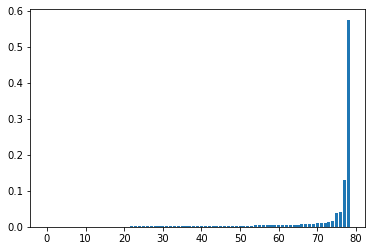

In [14]:
# plot
pyplot.bar(range(len(model.feature_importances_)), sorted(model.feature_importances_))
pyplot.show()

In [15]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, model.predict(X_test), squared=False)
print(rms)

22931.5891039567


## Feature Importance

In [17]:
d = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])
d.sort_values('Importance',ascending=False).head(25)

,Importance
OverallQual,0.574460
TotalLivingArea,0.130432
YearBuilt,0.041246
GarageCars,0.038201
FullBath,0.016057
Fireplaces,0.013401
Nbhd_Crawfor,0.010732
OverallCond,0.010715
LC_FR3,0.010591
MSSubClass,0.008616
